In [32]:
import tensorflow as tf 
import seaborn as sb 
import pandas as pd 
import sklearn as sk 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

print("the tensorflow version is {}".format(tf.__version__))
print("the pandas version is {}".format(pd.__version__))
print("the sklearn version is {}".format(sk.__version__))
print("the seaborn version is {}".format(sb.__version__))

the tensorflow version is 2.1.0
the pandas version is 1.0.3
the sklearn version is 0.22.2.post1
the seaborn version is 0.10.1


In [3]:
# get the file data
data_file = tf.keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")



32768/30286 [================================] - 0s 3us/step


In [23]:
# load the data into pandas
column_names = ['mpg', 'cyl', 'displacement', 'hp', 'weight', 'acceleration', 'year', 'country']
auto_df = pd.read_csv(data_file, na_values="?", comment="\t", sep=" ", skipinitialspace=True, names=column_names)

auto_df.head(5)

,mpg,cyl,displacement,hp,weight,acceleration,year,country
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [24]:
# look for na values
auto_df.isna().sum()


mpg             0
cyl             0
displacement    0
hp              6
weight          0
acceleration    0
year            0
country         0
dtype: int64

In [25]:
# describe the data
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cyl           398 non-null    int64  
 2   displacement  398 non-null    float64
 3   hp            392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   year          398 non-null    int64  
 7   country       398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [26]:
# drop the na data
auto_df = auto_df.dropna()

auto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cyl           392 non-null    int64  
 2   displacement  392 non-null    float64
 3   hp            392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   country       392 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 27.6 KB


In [27]:
# shuffle the data
auto_df = shuffle(auto_df, random_state=2)

In [28]:
# one hot the country column
auto_df = pd.get_dummies(auto_df, columns=['country'])

auto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 56 to 170
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cyl           392 non-null    int64  
 2   displacement  392 non-null    float64
 3   hp            392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   country_1     392 non-null    uint8  
 8   country_2     392 non-null    uint8  
 9   country_3     392 non-null    uint8  
dtypes: float64(5), int64(2), uint8(3)
memory usage: 25.6 KB


In [29]:
# show the data
auto_df.head(5)

,mpg,cyl,displacement,hp,weight,acceleration,year,country_1,country_2,country_3
56,26.0,4,91.0,70.0,1955.0,20.5,71,1,0,0
71,19.0,3,70.0,97.0,2330.0,13.5,72,0,0,1
315,24.3,4,151.0,90.0,3003.0,20.1,80,1,0,0
181,33.0,4,91.0,53.0,1795.0,17.5,75,0,0,1
309,41.5,4,98.0,76.0,2144.0,14.7,80,0,1,0


In [30]:
# get the features and labels
feature_df = auto_df
label_df = feature_df.pop('mpg')

# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(feature_df, label_df, test_size=0.2)

print("the train dataset is of shape {} and train label of shape{}".format(X_train.shape, y_train.shape))
print("the test dataset is of shape {} and test label of shape{}".format(X_test.shape, y_test.shape))

the train dataset is of shape (313, 9) and train label of shape(313,)
the test dataset is of shape (79, 9) and test label of shape(79,)


In [39]:
# scale the data
# build the scaler
scaler = StandardScaler()

# fit the scaler on the training data
scaler.fit(X_train)

# transform the traning and test data
X_train = pd.DataFrame(scaler.transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

X_train.head(5)

,0,1,2,3,4,5,6,7,8
0,0.306410,0.292453,-0.102450,0.754840,0.791737,0.286114,0.804592,-0.476918,-0.511954
1,1.483177,1.183913,1.228124,0.899904,-0.566247,0.016374,0.804592,-0.476918,-0.511954
2,-0.870356,-1.107045,-0.980629,-1.179741,-0.015713,-0.523105,-1.242866,2.096796,-0.511954
3,-0.870356,-0.790720,-0.421788,-0.434689,1.489080,1.634812,0.804592,-0.476918,-0.511954
4,0.306410,0.052813,-0.501622,0.104951,0.424714,0.555853,0.804592,-0.476918,-0.511954


In [44]:
# build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(9,), activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# compile the model
# model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [47]:
# fit the model
history = model.fit(X_train, y_train, epochs=50, batch_size=20, validation_split=0.2)

Train on 250 samples, validate on 63 samples
Epoch 1/50
250/250 [==============================] - 0s 107us/sample - loss: 5.4139 - mae: 1.7021 - mse: 5.4139 - val_loss: 14.6244 - val_mae: 2.6179 - val_mse: 14.6244
Epoch 2/50
250/250 [==============================] - 0s 83us/sample - loss: 5.4392 - mae: 1.7092 - mse: 5.4392 - val_loss: 14.3909 - val_mae: 2.6118 - val_mse: 14.3909
Epoch 3/50
250/250 [==============================] - 0s 84us/sample - loss: 5.3576 - mae: 1.6846 - mse: 5.3576 - val_loss: 14.7401 - val_mae: 2.6382 - val_mse: 14.7401
Epoch 4/50
250/250 [==============================] - 0s 78us/sample - loss: 5.2552 - mae: 1.6807 - mse: 5.2552 - val_loss: 14.5659 - val_mae: 2.6235 - val_mse: 14.5659
Epoch 5/50
250/250 [==============================] - 0s 81us/sample - loss: 5.2761 - mae: 1.6842 - mse: 5.2761 - val_loss: 14.3049 - val_mae: 2.6182 - val_mse: 14.3049
Epoch 6/50
250/250 [==============================] - 0s 75us/sample - loss: 5.2190 - mae: 1.6711 - mse: 5.21

(0.0, 20.0)

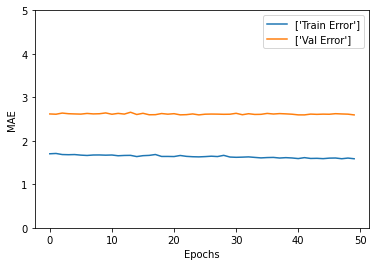

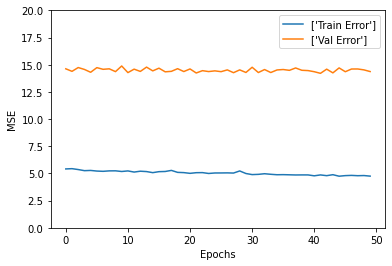

In [58]:
# import matplotlib
import matplotlib.pyplot as plt 

# plot the history
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# plot
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.plot(hist['epoch'], hist['mae'], label=['Train Error'])
plt.plot(hist['epoch'], hist['val_mae'], label=['Val Error'])
plt.legend()
plt.ylim([0, 5])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.plot(hist['epoch'], hist['mse'], label=['Train Error'])
plt.plot(hist['epoch'], hist['val_mse'], label=['Val Error'])
plt.legend()
plt.ylim([0, 20])




In [53]:
history